## Импорт

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import plotly.express as px

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

## Загрузка исходного файла

In [4]:
df0 = pd.read_excel('df.xlsx', sheet_name = 0)

In [5]:
display(df0.head(5))

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Прогноз,MAE,MAPE,Цена(кв.м)_пр,Исп,Комм,Цена(кв.м),Выброс_итог,Выброс_1,Комм.1,PC_1,PC_2,TSNE_1,TSNE_2,IsolationForest_pca,OneClassSVM_pca,IsolationForest,OneClassSVM,Выброс_3,Комм.2,Исп.1,dup_all,dup_1,dup_2,dup(<=0.03),Пересечения(<=0.03),Пересечения(>=0.03),dup_res,КН_гис,ОПлощадь,Оплощадь_перв,Комнатность_1,Комнатность_перв,Этаж_1,Этаж_1_в,Этаж_2,Этаж_3,Этаж_4,Этажность_1,Этажность_2,Неточность,Этажность_гис,Этажность_мин,Этажность_прдом,разница,разница.1,Этаж/Этажность,ГП_2,Неточность.1,ГП_1,ГП_гис,ГП_мин,Проверка,ГП_прдом,разница.2,ГП_перв,Ремонт_1,Cluster_1,Cluster_2,Ремонт_2,Ремонт_3,Ремонт_1_в,Неточность.2,Число_р,Ремонт_перв,Стены_2,Стены_1,Стены_1_в,Неточность.3,Число_c,Стены_dom,Проверка.1,Стены_перв,Санузел_1,Санузел_перв,Просмотры_1,Просмотры_перв,Дата,Терраса,Многоуровневая,Витрины,Ветер,Раст_центр_1,Раст_центр_2,Район_1,Район_2,ЖК,Статус,Неточность.4,Число_жк,Вид_БД,Вид_н_БД,Вид_all,Вид_мбзп,Вид_зр,Вид_город,Сост_гис,Сост_codi,Долгота,Широта,Сцепка_к,Сцепка_3,Сцепка_4,Адрес_перв,Адрес_yandex,Проверка.2,НП,Тип,Наименование,дом/корп/стр,Склейка_вспомог,Сцепка_1,Сцепка_2,ПОИСК_2,ПОИСК,на мбзп,на город,Текст,Продавец,Ссылка,Район,Застройщик,Характеристики,Код объекта,Высота потолков,Кухня-гостиная,Балкон/лоджия,Материал окон,Солнечная сторона,Вид из окон,Окна,Сторона окон,Тип комнат,Тёплый пол,Домофон,Железная дверь,Счетчик воды,Подключённые сервисы,Лифт,Пассажирский лифт,Грузовой лифт,Номер дома,"Корпус, строение",Двор,Парковка,Площадь балкона,Пандус,Колясочная,В доме,Дополнительно,Площадка для выгула собак,Остекление балкона,Система водонагрева,Велосипедная,Площадь кухни,Жилая площадь,Счетчик тепла,Коммунальные платежи,Мебель,Техника,строение,Детская площадка,Квартира угловая / торцевая,Кондиционер,Консьерж,Воздушные фильтры,Фильтры для воды,Кладовка,Видеодомофон,Охранная сигнализация,Нежилые помещения на первом этаже,Расположение на этаже,Срок сдачи,Выдача ключей,Отделка,Название новостройки,Тип участия,Название ЖК,Подъезд,Способ продажи,Вид сделки
0,1_этажи,0,этажи,15.955577,8500000,9500000.0,NaN,NaN,NaN,NaN,NaN,NaN,228494.623656,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,1,25:28:030010:2137,37.2,37.2 м²,1-к,1-к,10.0,0,средний,этажи 6-10,этажи 6-10,25.0,от 20 до 30,NaN,25,24,-,1.041667,1,10 из 25,2020,NaN,2020,2020,2020,True,-,0,2020,Стандартный,NaN,NaN,Улучшенный,Улучшенный,0,0.0,4.0,современный ремонт,монолитные,монолитные,0,NaN,3,-,-,монолитно-кирпичный,раздельный,раздельный,2827.0,2827 просмотров,NaN,нет,нет,нет,Юго-Восточный,3747.334146,от 3000 до 5000,Чуркин,Чуркин,нет,NaN,NaN,1,есть,нет,нет,нет,нет,нет,Исправный,NaN,131.927984,43.102557,131.927984 43.102557,10 131.927984 43.102557,10 3 131.927984 43.102557,"р-н Чуркин, ул. Калинина, 11ак2 (4.1 км до цен...","Россия, Приморский край, Владивосток, улица Ка...",112,Владивосток,ул.,Калинина,11ак2,"Владивосток, ул. Калинина, 11ак2",10 Калинина 11ак2 Чуркин,Калинина 11ак2,0,0.0,0.0,0.0,"Компания ""Этажи-Владивосток"" предлагает к прод...",NaN,https://vl.etagi.com/realty/9519434/,Чуркин,NaN,"1-комн. квартира, 37.2м², 10/25 этаж",9519434.0,2.5 м,да,есть балкон,пластиковые,часть окон,во двор,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"телефон, интернет, кабельное телевидение",пассажирский и грузовой,NaN,NaN,11а к2,2,открытый двор,подземный паркинг,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,1,этажи,15.990262,8800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169230.769231,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,-,52.0,52 м²,2-к,2-комн.,12.0,0,средний,этажи 11-25,этажи 11-25,25.0,от 20 до 30,NaN,-,-,-,-,-,12 из 25,-,NaN,2023,-,-,-,-,-,2023,Без отделки,NaN,NaN,Без отделки,Без отделки,0,NaN,1.0,черновая отделка,монолитные,монолитно-кирпичный,0,NaN,3,-,-,монолитно-кирпичный,раздельный,раздельный,1868.0,1868 просмотров,NaN,нет,нет,есть,Северо-западный,NaN,NaN,Центр,Центр,нет,NaN,NaN,1,нет,нет,нет,нет

In [6]:
df0.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8962 entries, 0 to 8961
Data columns (total 187 columns):
 #    Column                             Non-Null Count  Dtype  
---   ------                             --------------  -----  
 0    ID                                 8962 non-null   object 
 1    Мусор                              8962 non-null   int64  
 2    Агрегатор                          8962 non-null   object 
 3    LN(Цена)                           8962 non-null   float64
 4    Цена                               8962 non-null   int64  
 5    Цена_перв                          705 non-null    float64
 6    Прогноз                            4624 non-null   float64
 7    MAE                                4624 non-null   float64
 8    MAPE                               4624 non-null   float64
 9    Цена(кв.м)_пр                      4624 non-null   float64
 10   Исп                                115 non-null    object 
 11   Комм                               0 non-

## Удаление дубликатов и мусора

In [7]:
df1 = df0[(df0['Мусор'] == 0) & (df0['dup_res'] == 0)]

In [8]:
len(df1)

4688

## Удаление лишних столбцов

In [9]:
df = df1[[
    'ID',
    'Цена',
    'Цена(кв.м)',
    'ОПлощадь',
    'Комнатность_1',
    'Этаж_1',
    'Этаж_2',
    'Этаж_3',
    'Этаж_4',
    'Этажность_1',
    'Этажность_2',
    'ГП_2',
    'Ремонт_2',
    'Ремонт_3',
    'Стены_2',
    'Стены_1',
    'Санузел_1',
    'Просмотры_1',
    'Терраса',
    'Многоуровневая',
    'Витрины',
    'Ветер',
    'Раст_центр_1',
    'Раст_центр_2',
    'Район_1',
    'Район_2',
    'ЖК',
    'Вид_all',
    'Вид_мбзп',
    'Вид_зр',
    'Вид_город',
    'Балкон/лоджия'
]].reset_index(drop=True)

In [10]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4688 non-null   object 
 1   Цена            4688 non-null   int64  
 2   Цена(кв.м)      4688 non-null   float64
 3   ОПлощадь        4688 non-null   float64
 4   Комнатность_1   4629 non-null   object 
 5   Этаж_1          4688 non-null   float64
 6   Этаж_2          4688 non-null   object 
 7   Этаж_3          4688 non-null   object 
 8   Этаж_4          4688 non-null   object 
 9   Этажность_1     4688 non-null   float64
 10  Этажность_2     4688 non-null   object 
 11  ГП_2            4688 non-null   object 
 12  Ремонт_2        4688 non-null   object 
 13  Ремонт_3        4688 non-null   object 
 14  Стены_2         4688 non-null   object 
 15  Стены_1         4688 non-null   object 
 16  Санузел_1       1105 non-null   object 
 17  Просмотры_1     4455 non-null   f

## Предварительный анализ и предобработка данных

In [11]:
display(df.head(5))

,ID,Цена,Цена(кв.м),ОПлощадь,Комнатность_1,Этаж_1,Этаж_2,Этаж_3,Этаж_4,Этажность_1,Этажность_2,ГП_2,Ремонт_2,Ремонт_3,Стены_2,Стены_1,Санузел_1,Просмотры_1,Терраса,Многоуровневая,Витрины,Ветер,Раст_центр_1,Раст_центр_2,Район_1,Район_2,ЖК,Вид_all,Вид_мбзп,Вид_зр,Вид_город,Балкон/лоджия
0,33_этажи,3400000,203592.814371,16.7,1-к,9.0,последний,последний,последний,9.0,от 5 до 10,1975,Стандартный,Стандартный,панельные,панельные,совмещенный,264.0,нет,нет,нет,Умеренный,6971.611383,от 5000 до 10000,Борисенко,Борисенко,нет,нет,нет,нет,нет,нет балкона
1,58_этажи,7800000,162500.000000,48.0,2-к,6.0,средний,этажи 6-10,этажи 6-10,9.0,от 5 до 10,1981,Стандартный,Стандартный,панельные,панельные,раздельный,116.0,нет,нет,нет,Умеренный,25017.989307,более 10000,Трудовое,Трудовое_Весенняя_Пригород_Горонстай,нет,нет,нет,нет,нет,есть балкон
2,71_этажи,7500000,208913.649025,35.9,1-к,8.0,средний,этажи 6-10,этажи 6-10,10.0,от 5 до 10,2008,Стандартный,Стандартный,панельные,панельные,раздельный,69.0,нет,нет,нет,Северо-западный,7801.234352,от 5000 до 10000,Вторая Речка,Вторая Речка,нет,нет,нет,нет,нет,есть балкон
3,85_этажи,6200000,177142.857143,35.0,1-к,23.0,средний,этажи 11-25,этажи 11-25,26.0,от 20 до 30,2023,Стандартный,Стандартный,монолитные,монолитно-каркасные,раздельный,225.0,нет,нет,есть,Северо-западный,9144.739297,от 5000 до 10000,Заря,Заря,нет,есть,нет,нет,нет,есть балкон
4,105_этажи,5100000,146131.805158,34.9,1-к,2.0,средний,этажи 2-5,этажи 2-5,6.0,от 5 до 10,1968,Стандартный,Стандартный,панельные,панельные,раздельный,610.0,нет,нет,нет,Умеренный,4474.610140,от 3000 до 5000,Луговая,Луговая,нет,нет,нет,нет,нет,есть балкон


In [12]:
df['ГП_2'] = df['ГП_2'].astype('int')

In [13]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4688 non-null   object 
 1   Цена            4688 non-null   int64  
 2   Цена(кв.м)      4688 non-null   float64
 3   ОПлощадь        4688 non-null   float64
 4   Комнатность_1   4629 non-null   object 
 5   Этаж_1          4688 non-null   float64
 6   Этаж_2          4688 non-null   object 
 7   Этаж_3          4688 non-null   object 
 8   Этаж_4          4688 non-null   object 
 9   Этажность_1     4688 non-null   float64
 10  Этажность_2     4688 non-null   object 
 11  ГП_2            4688 non-null   int64  
 12  Ремонт_2        4688 non-null   object 
 13  Ремонт_3        4688 non-null   object 
 14  Стены_2         4688 non-null   object 
 15  Стены_1         4688 non-null   object 
 16  Санузел_1       1105 non-null   object 
 17  Просмотры_1     4455 non-null   f

## Анализ численных признаков

In [185]:
params = ['ОПлощадь', 'ГП_2', 'Просмотры_1', 'Раст_центр_1']

ОПлощадь


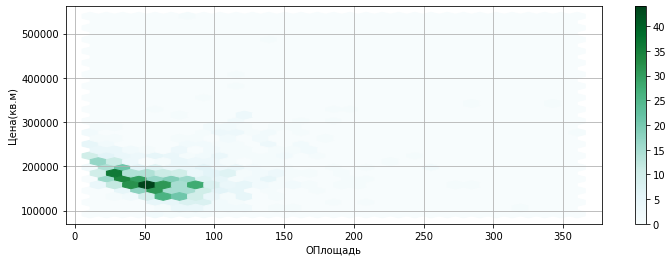

Корреляция цены от ОПлощадь: 11.91%

ГП_2


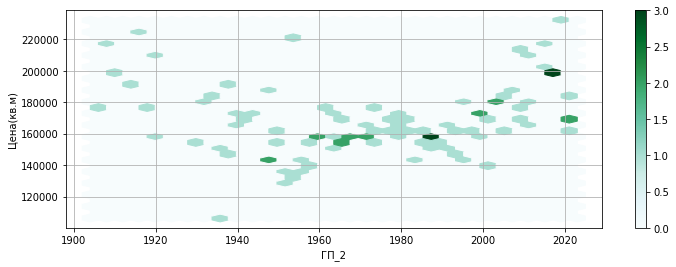

Корреляция цены от ГП_2: 11.30%

Просмотры_1


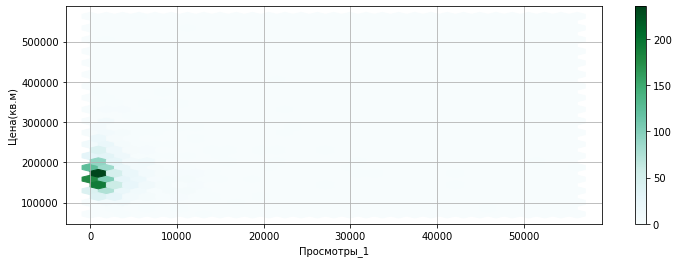

Корреляция цены от Просмотры_1: 5.11%

Раст_центр_1


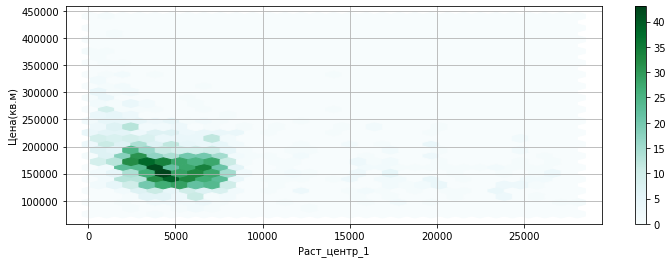

Корреляция цены от Раст_центр_1: -25.36%



In [187]:
for description in params:
    print(description)
    df_g = df.groupby(description).agg({'Цена(кв.м)': 'median'})
    df_g[description] = df_g.index
    df_g.plot(x=description, y='Цена(кв.м)', kind='hexbin', grid=True, figsize=(12, 4), gridsize=30, sharex=False, )
    plt.show()
    print('Корреляция цены от {}: {:.2%}'.format(description, df_g['Цена(кв.м)'].corr(df_g[description])))
    print()

## Анализ категориальных признаков

In [194]:
params = ['Комнатность_1', 'Стены_2', 'Стены_1', 'Санузел_1', 'Терраса', 'Многоуровневая', 'Витрины', 'Ветер', 'Раст_центр_2', 'ЖК', 'Балкон/лоджия']

Комнатность_1


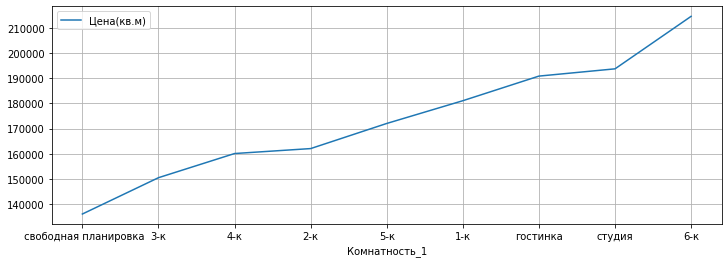


Стены_2


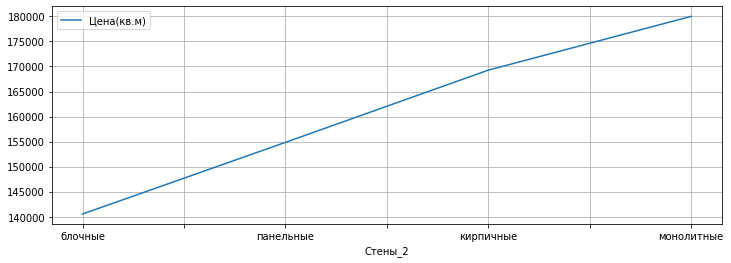


Стены_1


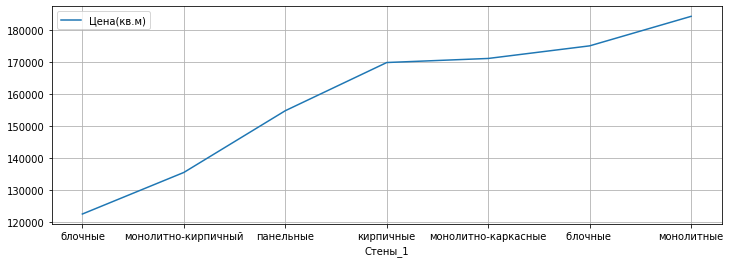


Санузел_1


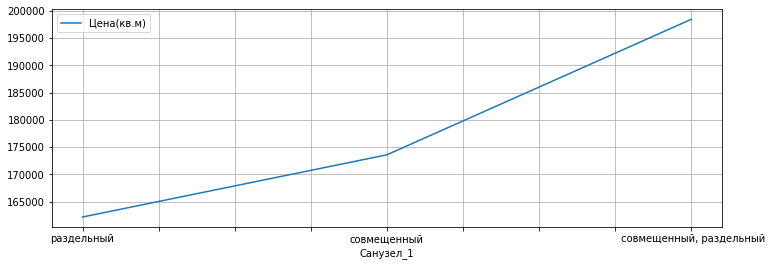


Терраса


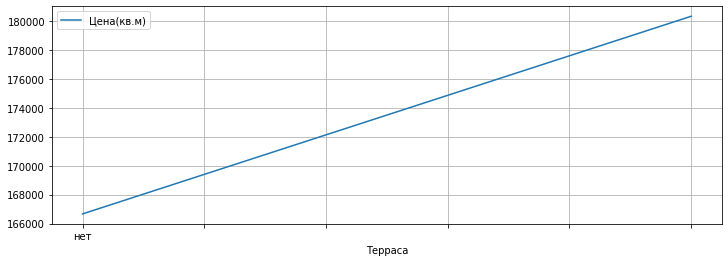


Многоуровневая


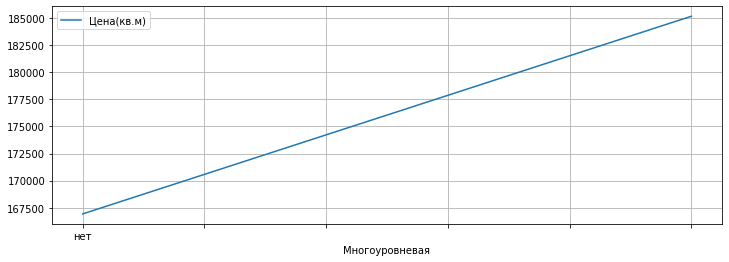


Витрины


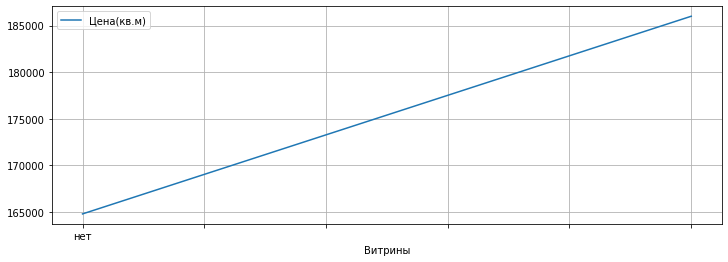


Ветер


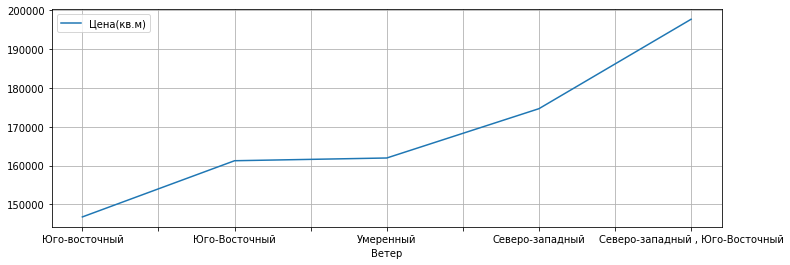


Раст_центр_2


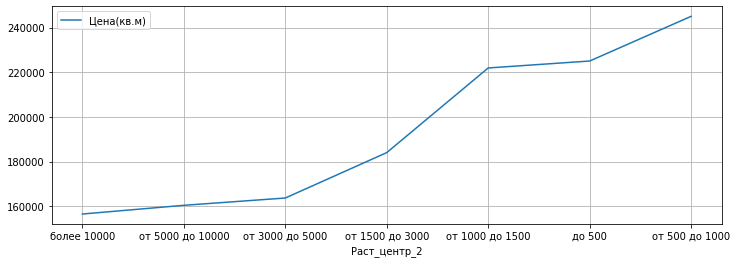


ЖК


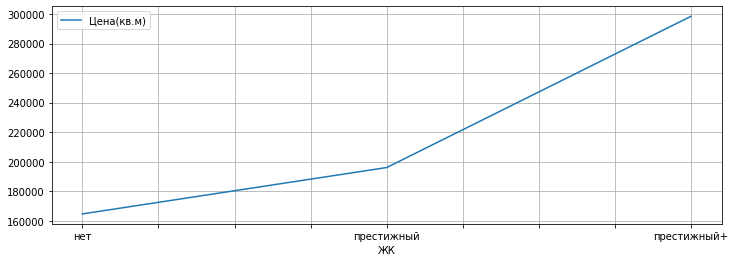


Балкон/лоджия


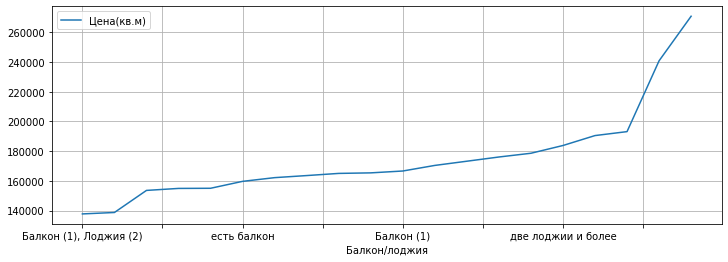

In [195]:
for description in params:
    print(description)
    report = df.groupby(description).agg({'Цена(кв.м)': 'median'}).sort_values(['Цена(кв.м)'])
    report.plot(kind='line',  grid=True, figsize=(12, 4), )
    plt.show()
    print()

## Анализ групп схожих признаков

### Вид

In [190]:
views = ['Вид_all', 'Вид_мбзп', 'Вид_зр', 'Вид_город']

In [191]:
for view in views:
    display(df.groupby([view])['Цена(кв.м)'].median().sort_values(ascending=False))

Вид_all
есть    180000.000000
нет     163093.415008
Name: Цена(кв.м), dtype: float64

Вид_мбзп
есть    190751.445087
нет     164150.943396
Name: Цена(кв.м), dtype: float64

Вид_зр
есть    222330.097087
нет     166412.811980
Name: Цена(кв.м), dtype: float64

Вид_город
есть    183579.652861
нет     166165.321705
Name: Цена(кв.м), dtype: float64

### Районы

<AxesSubplot:xlabel='Цена(кв.м)', ylabel='Район_1'>

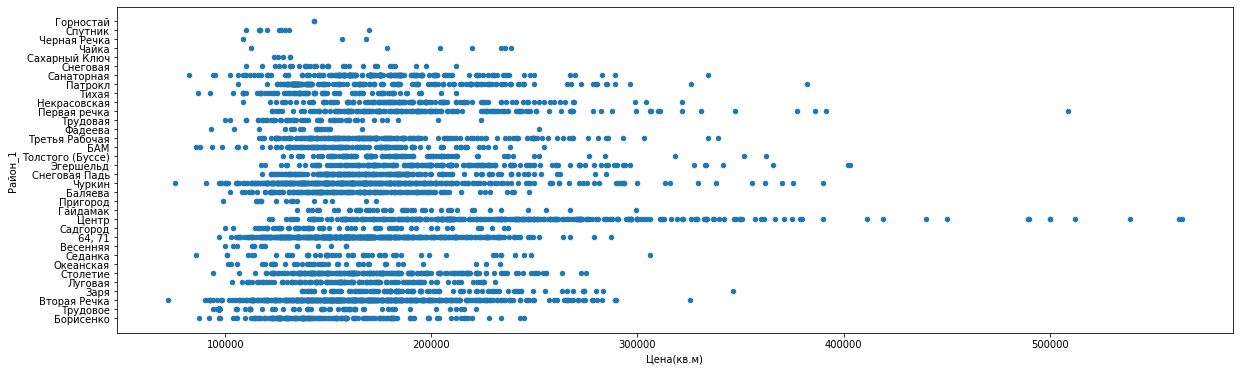

In [131]:
df.plot(kind='scatter', x='Цена(кв.м)', y='Район_1', figsize=(20, 6))

In [184]:
df.groupby(['Район_1'])['Цена(кв.м)'].median().sort_values(ascending=False)

Район_1
Центр               231075.697211
Чайка               219780.219780
Эгершельд           197695.623342
Первая речка        191095.890411
Некрасовская        186170.279610
Заря                184174.142630
Гайдамак            180140.843127
Толстого (Буссе)    179041.062408
Санаторная          172271.125542
Третья Рабочая      170068.027211
Снеговая Падь       167597.765363
Столетие            167410.747652
Вторая Речка        161841.400666
Чуркин              161252.900232
Патрокл             160526.911148
Седанка             160508.624015
64, 71              160427.807487
Баляева             158557.625949
БАМ                 158139.520699
Луговая             157534.246575
Черная Речка        156675.749319
Снеговая            147058.823529
Океанская           146374.829001
Садгород            145194.274029
Фадеева             144508.670520
Горностай           142931.702953
Тихая               142857.142857
Борисенко           141399.861514
Трудовая            137735.849057
Пригор

In [182]:
districts = df.groupby(['Район_1'])['Цена(кв.м)'].median().sort_values(ascending=False).index
districts

Index(['Центр', 'Чайка', 'Эгершельд', 'Первая речка', 'Некрасовская', 'Заря',
       'Гайдамак', 'Толстого (Буссе)', 'Санаторная', 'Третья Рабочая',
       'Снеговая Падь', 'Столетие', 'Вторая Речка', 'Чуркин', 'Патрокл',
       'Седанка', '64, 71', 'Баляева', 'БАМ', 'Луговая', 'Черная Речка',
       'Снеговая', 'Океанская', 'Садгород', 'Фадеева', 'Горностай', 'Тихая',
       'Борисенко', 'Трудовая', 'Пригород', 'Сахарный Ключ', 'Спутник',
       'Весенняя', 'Трудовое'],
      dtype='object', name='Район_1')

In [147]:
len(districts)

34

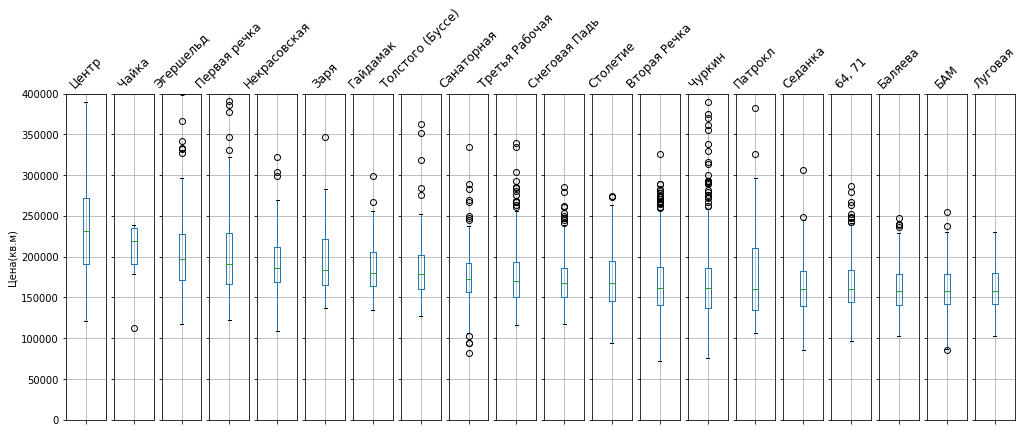

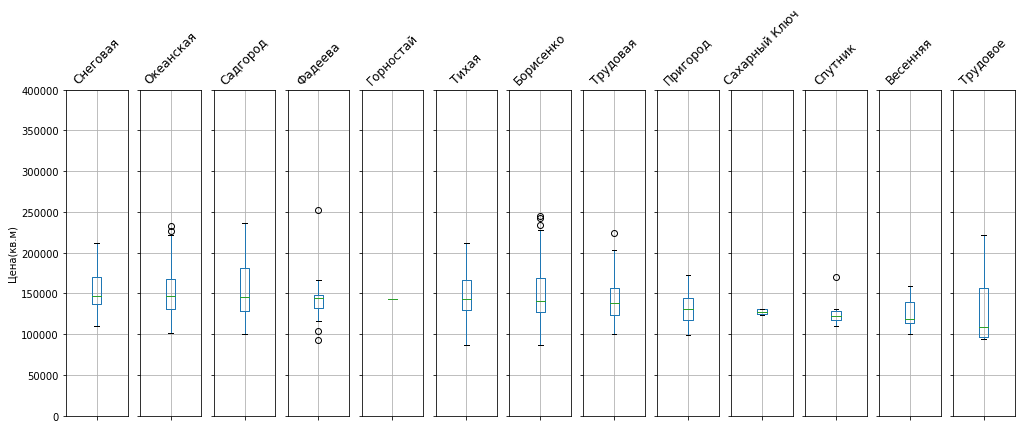

In [183]:
fig, axes = plt.subplots(1,20, figsize=(17,6))
i = 0
for dist in districts[0:20]:    
    df[df['Район_1'] == dist].boxplot('Цена(кв.м)',ax=axes[i])
    axes[i].set_title(dist, rotation=45)
    axes[i].set_ylim([0, 400000])
    axes[i].set_xticklabels([])
    if i > 0:
        axes[i].set_yticklabels([])        
    if i == 0:
        axes[i].set_ylabel('Цена(кв.м)')
    i = i + 1
plt.show()
print()
fig, axes = plt.subplots(1,13, figsize=(17,6))
j = 0
for dist in districts[21:34]:    
    df[df['Район_1'] == dist].boxplot('Цена(кв.м)',ax=axes[j])
    axes[j].set_title(dist, rotation=45)
    axes[j].set_ylim([0, 400000])
    axes[j].set_xticklabels([])
    if j > 0:
        axes[j].set_yticklabels([])        
    if j == 0:
        axes[j].set_ylabel('Цена(кв.м)')
    j = j + 1
plt.show()

### Ремонт

Ремонт_2


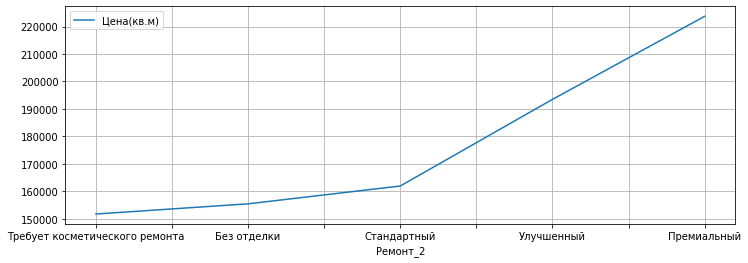


Ремонт_3


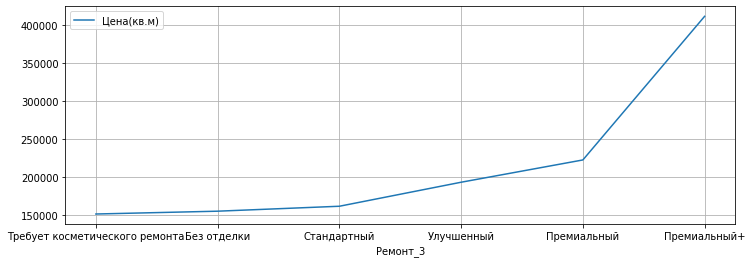

In [16]:
parametrs = ['Ремонт_2', 'Ремонт_3']

for description in parametrs:
    print(description)
    report = df.groupby(description).agg({'Цена(кв.м)': 'median'}).sort_values(['Цена(кв.м)'])
    report.plot(kind='line',  grid=True, figsize=(12, 4), )
    plt.show()
    print()

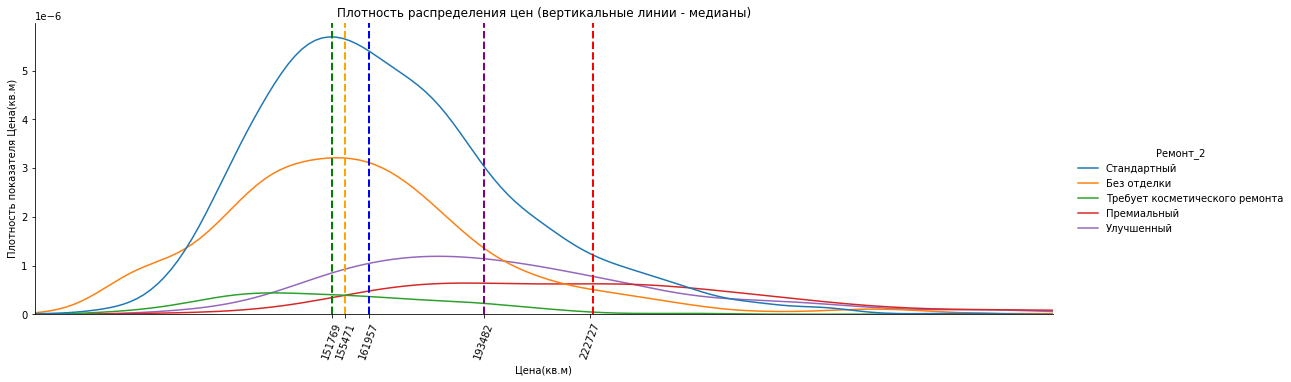

In [82]:
g = sns.displot(
    data = df,
    x = 'Цена(кв.м)',
    hue = 'Ремонт_2',
    kind = 'kde',
    height = 5,
    aspect = 3
).set(
    title = 'Плотность распределения цен (вертикальные линии - медианы)', 
    ylabel = 'Плотность показателя Цена(кв.м)'
)
g.refline(x = df[df['Ремонт_2'] == 'Стандартный']['Цена(кв.м)'].median(), color = 'blue', lw = 2)
g.refline(x = df[df['Ремонт_2'] == 'Без отделки']['Цена(кв.м)'].median(), color = 'orange', lw = 2)
g.refline(x = df[df['Ремонт_2'] == 'Требует косметического ремонта']['Цена(кв.м)'].median(), color = 'green', lw = 2)
g.refline(x = df[df['Ремонт_2'] == 'Премиальный']['Цена(кв.м)'].median(), color = 'red', lw = 2)
g.refline(x = df[df['Ремонт_2'] == 'Улучшенный']['Цена(кв.м)'].median(), color = 'purple', lw = 2)
plt.xticks(
    [
        df[df['Ремонт_3'] == 'Стандартный']['Цена(кв.м)'].median(), 
        df[df['Ремонт_3'] == 'Без отделки']['Цена(кв.м)'].median(),
        df[df['Ремонт_3'] == 'Требует косметического ремонта']['Цена(кв.м)'].median(),
        df[df['Ремонт_3'] == 'Премиальный']['Цена(кв.м)'].median(),
        df[df['Ремонт_3'] == 'Улучшенный']['Цена(кв.м)'].median(),
    ],
    [
        int(df[df['Ремонт_3'] == 'Стандартный']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Без отделки']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Требует косметического ремонта']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Премиальный']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Улучшенный']['Цена(кв.м)'].median()),
    ],
    rotation = 70
)
g.set(xlim=(70000,350000))

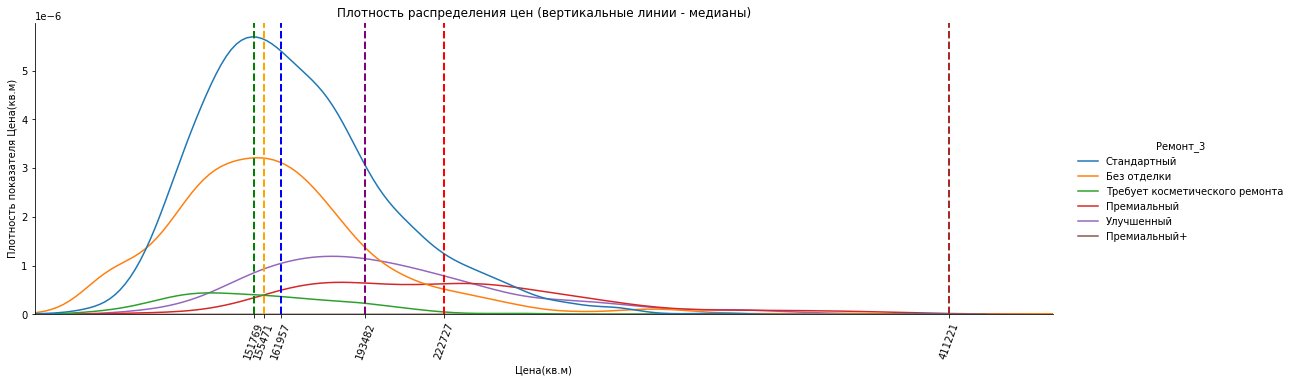

In [83]:
g1 = sns.displot(data = df, x = 'Цена(кв.м)', hue = 'Ремонт_3', kind = 'kde', height = 5, aspect = 3).set(title = 'Плотность распределения цен (вертикальные линии - медианы)', ylabel = 'Плотность показателя Цена(кв.м)')
g1.refline(x = df[df['Ремонт_3'] == 'Стандартный']['Цена(кв.м)'].median(), color = 'blue', lw = 2)
g1.refline(x = df[df['Ремонт_3'] == 'Без отделки']['Цена(кв.м)'].median(), color = 'orange', lw = 2)
g1.refline(x = df[df['Ремонт_3'] == 'Требует косметического ремонта']['Цена(кв.м)'].median(), color = 'green', lw = 2)
g1.refline(x = df[df['Ремонт_3'] == 'Премиальный']['Цена(кв.м)'].median(), color = 'red', lw = 2)
g1.refline(x = df[df['Ремонт_3'] == 'Улучшенный']['Цена(кв.м)'].median(), color = 'purple', lw = 2)
g1.refline(x = df[df['Ремонт_3'] == 'Премиальный+']['Цена(кв.м)'].median(), color = 'brown', lw = 2)
plt.xticks(
    [
        df[df['Ремонт_3'] == 'Стандартный']['Цена(кв.м)'].median(), 
        df[df['Ремонт_3'] == 'Без отделки']['Цена(кв.м)'].median(),
        df[df['Ремонт_3'] == 'Требует косметического ремонта']['Цена(кв.м)'].median(),
        df[df['Ремонт_3'] == 'Премиальный']['Цена(кв.м)'].median(),
        df[df['Ремонт_3'] == 'Улучшенный']['Цена(кв.м)'].median(),
        df[df['Ремонт_3'] == 'Премиальный+']['Цена(кв.м)'].median(),
    ],
    [
        int(df[df['Ремонт_3'] == 'Стандартный']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Без отделки']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Требует косметического ремонта']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Премиальный']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Улучшенный']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_3'] == 'Премиальный+']['Цена(кв.м)'].median())
    ],
    rotation = 70
)
g1.set(xlim=(70000,450000))

### Этаж

Этаж_1


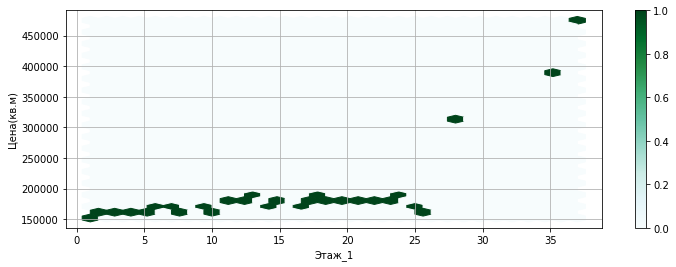

Корреляция цены от Этаж_1: 70.07%

Этажность_1


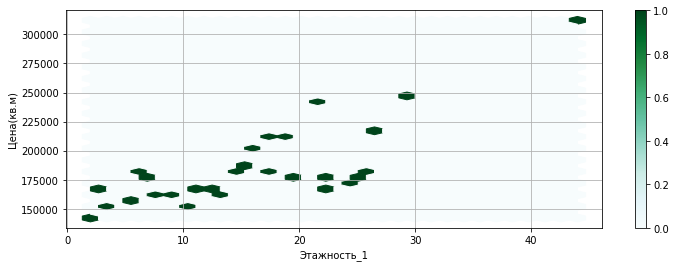

Корреляция цены от Этажность_1: 78.13%



In [118]:
parametrs = ['Этаж_1', 'Этажность_1']

for description in parametrs:
    print(description)
    df_g = df.groupby(description).agg({'Цена(кв.м)': 'median'})
    df_g[description] = df_g.index
    df_g.plot(x=description, y='Цена(кв.м)', kind='hexbin', grid=True, figsize=(12, 4), gridsize=30, sharex=False, )
    plt.show()
    print('Корреляция цены от {}: {:.2%}'.format(description, df_g['Цена(кв.м)'].corr(df_g[description])))
    print()

Этаж_2


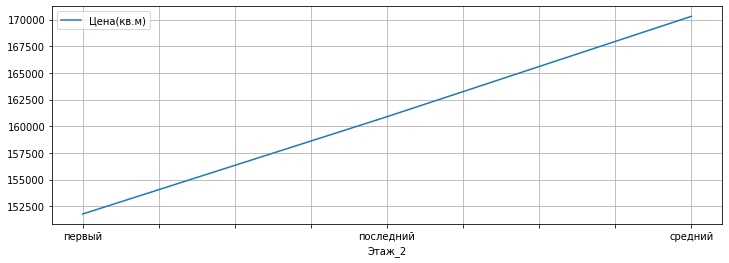


Этаж_3


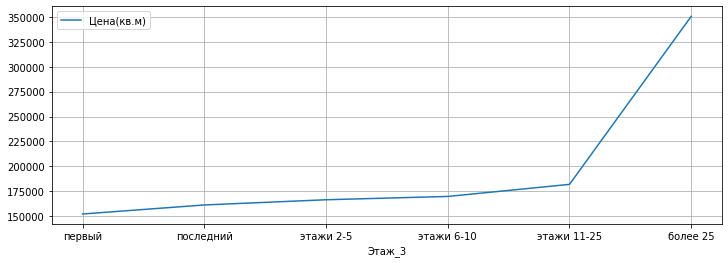


Этаж_4


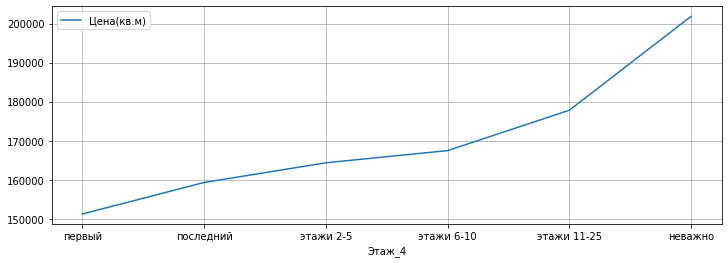


Этажность_2


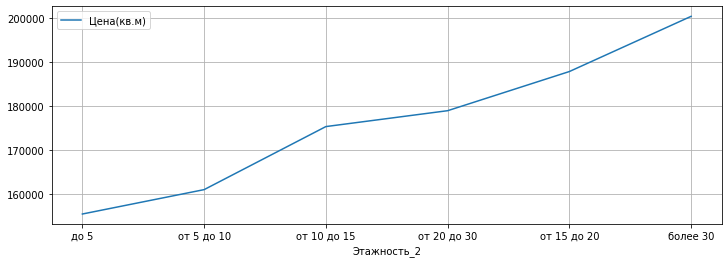

In [119]:
parametrs = ['Этаж_2', 'Этаж_3', 'Этаж_4', 'Этажность_2']

for description in parametrs:
    print(description)
    report = df.groupby(description).agg({'Цена(кв.м)': 'median'}).sort_values(['Цена(кв.м)'])
    report.plot(kind='line',  grid=True, figsize=(12, 4), )
    plt.show()
    print()

In [99]:
df.groupby(['Этаж_2'])['ID'].count()

Этаж_2
первый        581
последний     561
средний      3546
Name: ID, dtype: int64

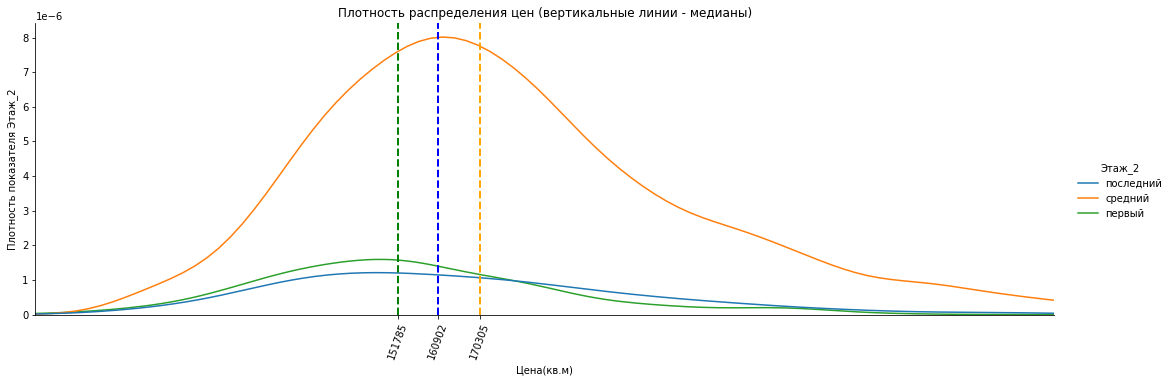

In [102]:
g = sns.displot(
    data = df,
    x = 'Цена(кв.м)',
    hue = 'Этаж_2',
    kind = 'kde',
    height = 5,
    aspect = 3
).set(
    title = 'Плотность распределения цен (вертикальные линии - медианы)', 
    ylabel = 'Плотность показателя Этаж_2'
)
g.refline(x = df[df['Этаж_2'] == 'первый']['Цена(кв.м)'].median(), color = 'green', lw = 2)
g.refline(x = df[df['Этаж_2'] == 'последний']['Цена(кв.м)'].median(), color = 'blue', lw = 2)
g.refline(x = df[df['Этаж_2'] == 'средний']['Цена(кв.м)'].median(), color = 'orange', lw = 2)
plt.xticks(
    [
        df[df['Этаж_2'] == 'первый']['Цена(кв.м)'].median(), 
        df[df['Этаж_2'] == 'последний']['Цена(кв.м)'].median(),
        df[df['Этаж_2'] == 'средний']['Цена(кв.м)'].median(),
    ],
    [
        int(df[df['Этаж_2'] == 'первый']['Цена(кв.м)'].median()),
        int(df[df['Этаж_2'] == 'последний']['Цена(кв.м)'].median()),
        int(df[df['Этаж_2'] == 'средний']['Цена(кв.м)'].median()),
    ],
    rotation = 70
)
g.set(xlim=(70000,300000))

In [103]:
df.groupby(['Этаж_3'])['ID'].count()

Этаж_3
более 25          6
первый          581
последний       561
этажи 11-25     818
этажи 2-5      1758
этажи 6-10      964
Name: ID, dtype: int64

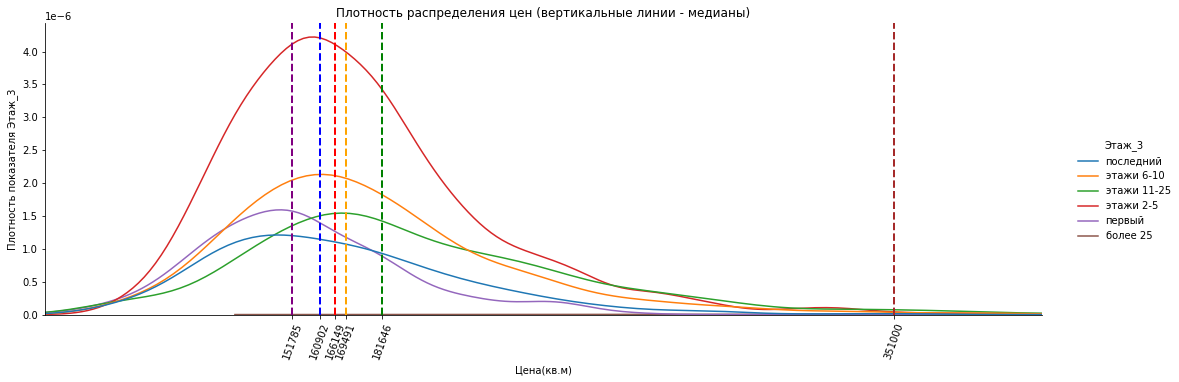

In [107]:
g = sns.displot(
    data = df,
    x = 'Цена(кв.м)',
    hue = 'Этаж_3',
    kind = 'kde',
    height = 5,
    aspect = 3
).set(
    title = 'Плотность распределения цен (вертикальные линии - медианы)', 
    ylabel = 'Плотность показателя Этаж_3'
)
g.refline(x = df[df['Этаж_3'] == 'первый']['Цена(кв.м)'].median(), color = 'purple', lw = 2)
g.refline(x = df[df['Этаж_3'] == 'последний']['Цена(кв.м)'].median(), color = 'blue', lw = 2)
g.refline(x = df[df['Этаж_3'] == 'этажи 2-5']['Цена(кв.м)'].median(), color = 'red', lw = 2)
g.refline(x = df[df['Этаж_3'] == 'этажи 6-10']['Цена(кв.м)'].median(), color = 'orange', lw = 2)
g.refline(x = df[df['Этаж_3'] == 'этажи 11-25']['Цена(кв.м)'].median(), color = 'green', lw = 2)
g.refline(x = df[df['Этаж_3'] == 'более 25']['Цена(кв.м)'].median(), color = 'brown', lw = 2)
plt.xticks(
    [
        df[df['Этаж_3'] == 'первый']['Цена(кв.м)'].median(), 
        df[df['Этаж_3'] == 'последний']['Цена(кв.м)'].median(),
        df[df['Этаж_3'] == 'этажи 2-5']['Цена(кв.м)'].median(),
        df[df['Этаж_3'] == 'этажи 6-10']['Цена(кв.м)'].median(),
        df[df['Этаж_3'] == 'этажи 11-25']['Цена(кв.м)'].median(),
        df[df['Этаж_3'] == 'более 25']['Цена(кв.м)'].median(),
    ],
    [
        int(df[df['Этаж_3'] == 'первый']['Цена(кв.м)'].median()),
        int(df[df['Этаж_3'] == 'последний']['Цена(кв.м)'].median()),
        int(df[df['Этаж_3'] == 'этажи 2-5']['Цена(кв.м)'].median()),
        int(df[df['Этаж_3'] == 'этажи 6-10']['Цена(кв.м)'].median()),
        int(df[df['Этаж_3'] == 'этажи 11-25']['Цена(кв.м)'].median()),
        int(df[df['Этаж_3'] == 'более 25']['Цена(кв.м)'].median()),
    ],
    rotation = 70
)
g.set(xlim=(70000,400000))

In [98]:
df.groupby(['Этаж_4'])['ID'].count()

Этаж_4
неважно         316
первый          565
последний       545
этажи 11-25     714
этажи 2-5      1638
этажи 6-10      910
Name: ID, dtype: int64

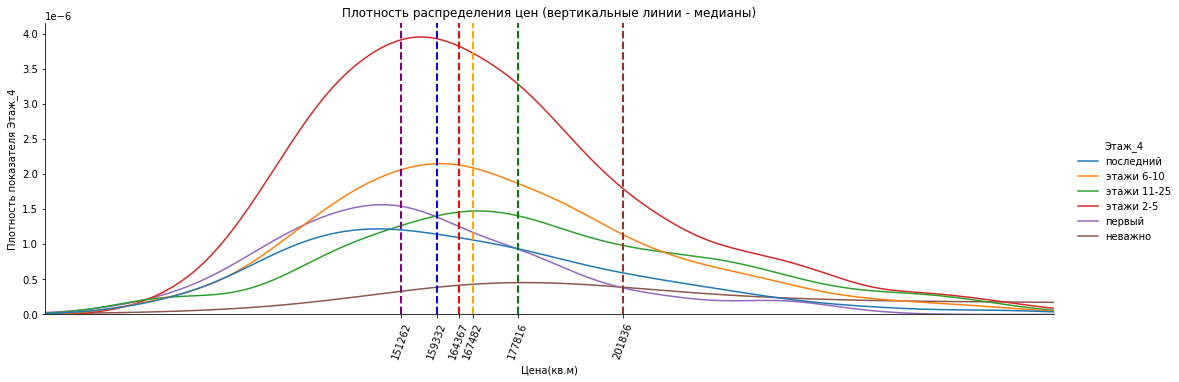

In [97]:
g = sns.displot(
    data = df,
    x = 'Цена(кв.м)',
    hue = 'Этаж_4',
    kind = 'kde',
    height = 5,
    aspect = 3
).set(
    title = 'Плотность распределения цен (вертикальные линии - медианы)', 
    ylabel = 'Плотность показателя Этаж_4'
)
g.refline(x = df[df['Этаж_4'] == 'первый']['Цена(кв.м)'].median(), color = 'purple', lw = 2)
g.refline(x = df[df['Этаж_4'] == 'последний']['Цена(кв.м)'].median(), color = 'blue', lw = 2)
g.refline(x = df[df['Этаж_4'] == 'этажи 11-25']['Цена(кв.м)'].median(), color = 'green', lw = 2)
g.refline(x = df[df['Этаж_4'] == 'этажи 2-5']['Цена(кв.м)'].median(), color = 'red', lw = 2)
g.refline(x = df[df['Этаж_4'] == 'этажи 6-10']['Цена(кв.м)'].median(), color = 'orange', lw = 2)
g.refline(x = df[df['Этаж_4'] == 'неважно']['Цена(кв.м)'].median(), color = 'brown', lw = 2)
plt.xticks(
    [
        df[df['Этаж_4'] == 'первый']['Цена(кв.м)'].median(), 
        df[df['Этаж_4'] == 'последний']['Цена(кв.м)'].median(),
        df[df['Этаж_4'] == 'этажи 11-25']['Цена(кв.м)'].median(),
        df[df['Этаж_4'] == 'этажи 2-5']['Цена(кв.м)'].median(),
        df[df['Этаж_4'] == 'этажи 6-10']['Цена(кв.м)'].median(),
        df[df['Этаж_4'] == 'неважно']['Цена(кв.м)'].median(),
    ],
    [
        int(df[df['Этаж_4'] == 'первый']['Цена(кв.м)'].median()),
        int(df[df['Этаж_4'] == 'последний']['Цена(кв.м)'].median()),
        int(df[df['Этаж_4'] == 'этажи 11-25']['Цена(кв.м)'].median()),
        int(df[df['Этаж_4'] == 'этажи 2-5']['Цена(кв.м)'].median()),
        int(df[df['Этаж_4'] == 'этажи 6-10']['Цена(кв.м)'].median()),
        int(df[df['Этаж_4'] == 'неважно']['Цена(кв.м)'].median())
    ],
    rotation = 70
)
g.set(xlim=(70000,300000))

In [108]:
df.groupby(['Этажность_2'])['ID'].count()

Этажность_2
более 30         56
до 5           1127
от 10 до 15     393
от 15 до 20     337
от 20 до 30    1087
от 5 до 10     1688
Name: ID, dtype: int64

In [111]:
df_e = df[df['Этажность_2'] == 'от 10 до 15']

до 5


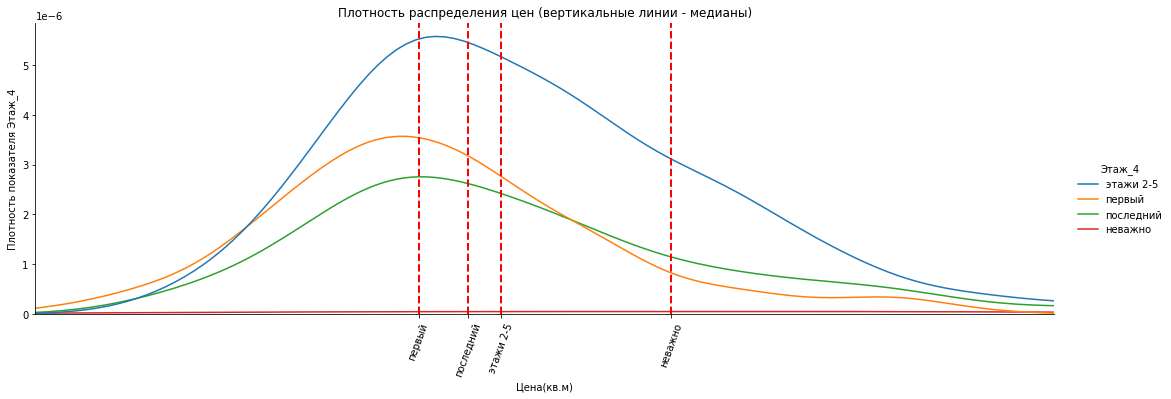


от 5 до 10


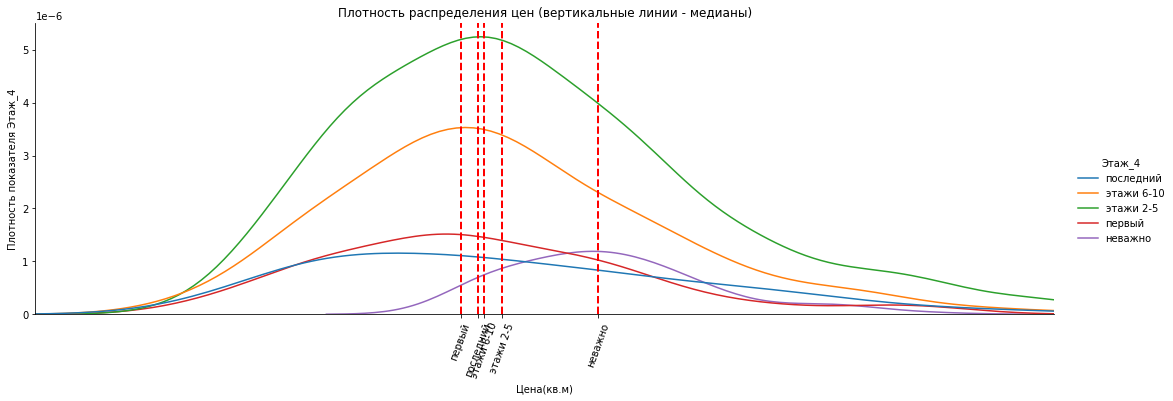


от 10 до 15


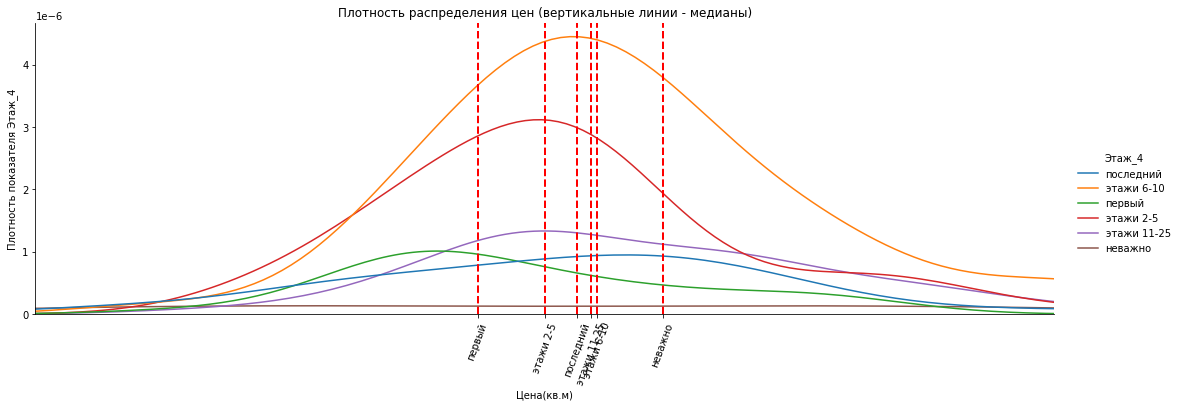


от 15 до 20


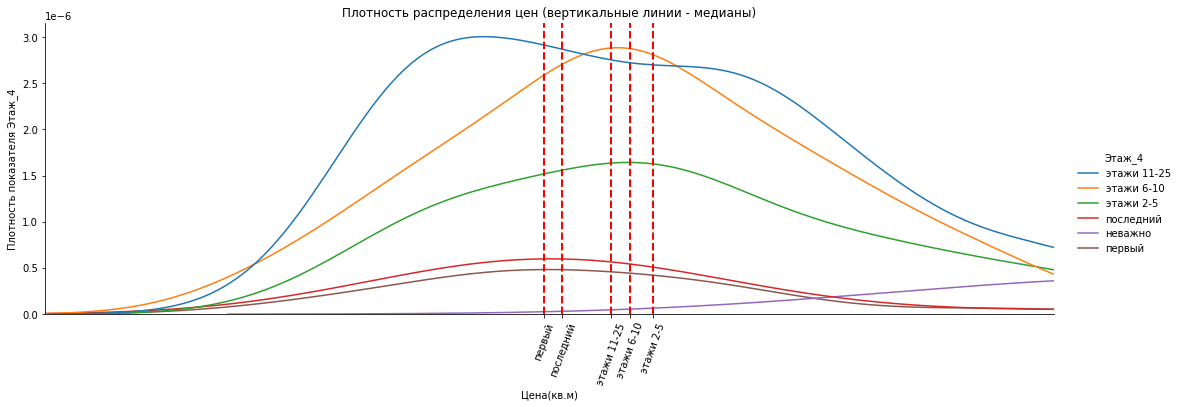


от 20 до 30


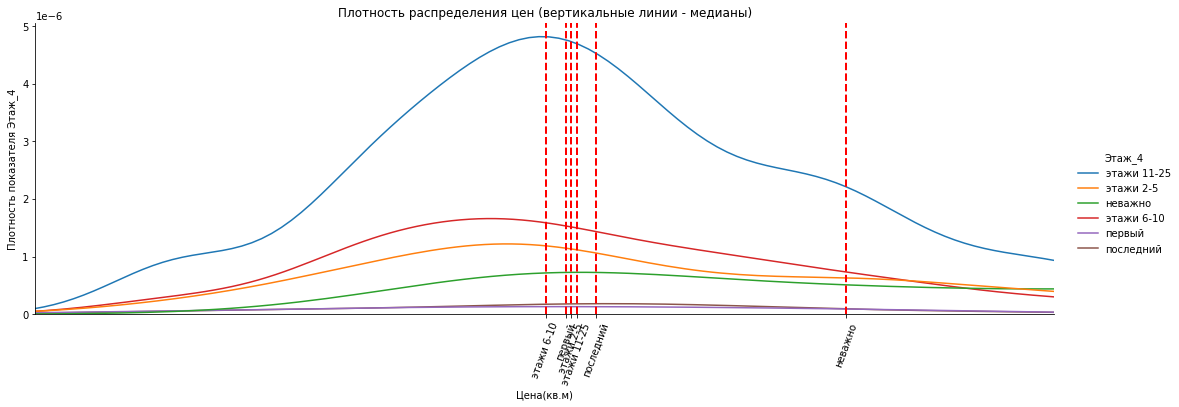


более 30


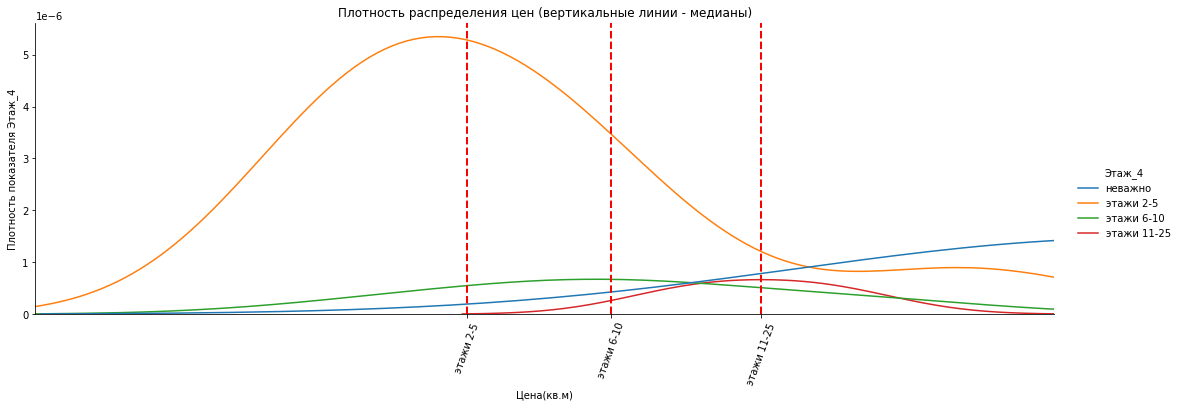

In [116]:
params = ['до 5', 'от 5 до 10', 'от 10 до 15', 'от 15 до 20', 'от 20 до 30', 'более 30']

for param in params:
    df_e = df[df['Этажность_2'] == param]
    print(param)
    g = sns.displot(
        data = df_e,
        x = 'Цена(кв.м)',
        hue = 'Этаж_4',
        kind = 'kde',
        height = 5,
        aspect = 3
    ).set(
        title = 'Плотность распределения цен (вертикальные линии - медианы)', 
        ylabel = 'Плотность показателя Этаж_4'
    )
    g.refline(x = df_e[df_e['Этаж_4'] == 'первый']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'последний']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'этажи 11-25']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'этажи 2-5']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'этажи 6-10']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'неважно']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    plt.xticks(
        [
            df_e[df_e['Этаж_4'] == 'первый']['Цена(кв.м)'].median(), 
            df_e[df_e['Этаж_4'] == 'последний']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'этажи 11-25']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'этажи 2-5']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'этажи 6-10']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'неважно']['Цена(кв.м)'].median(),
        ],
        [
            'первый',
            'последний',
            'этажи 11-25',
            'этажи 2-5',
            'этажи 6-10',
            'неважно'
        ],
        rotation = 70
    )
    g.set(xlim=(70000,270000))
    plt.show()
    print()

до 5


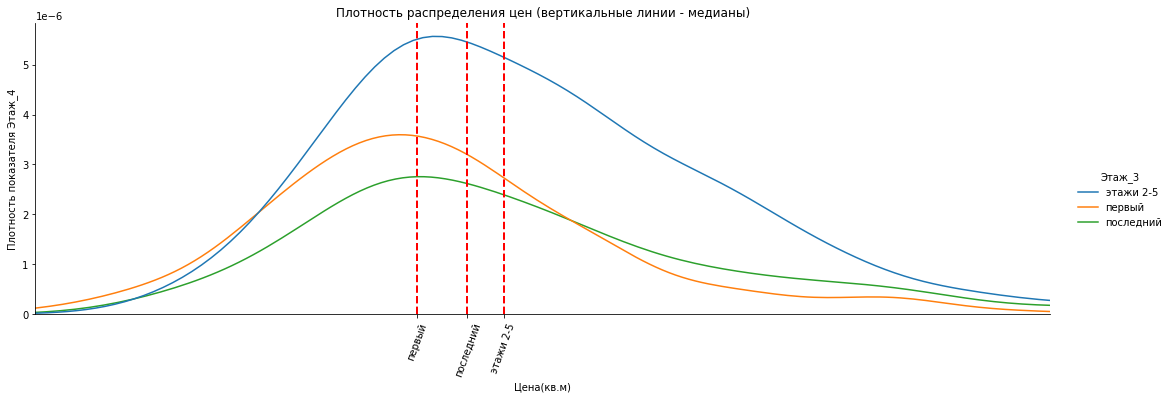


от 5 до 10


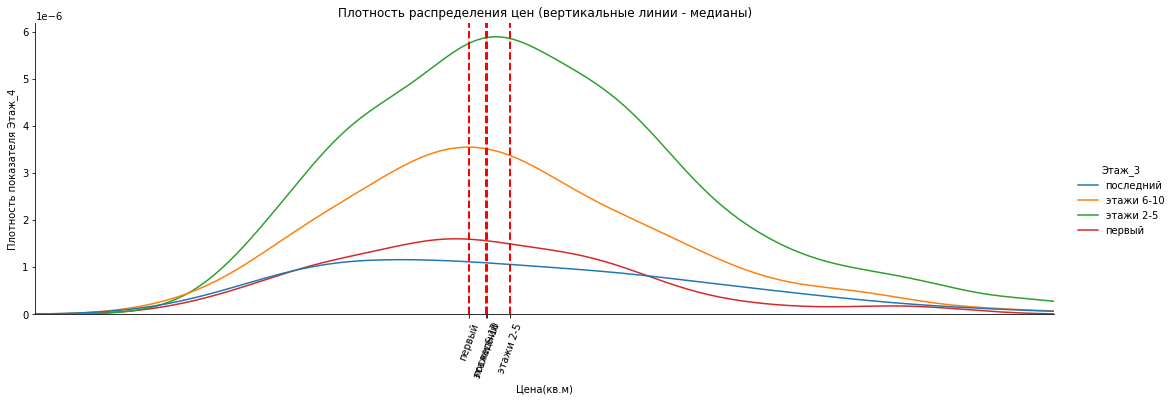


от 10 до 15


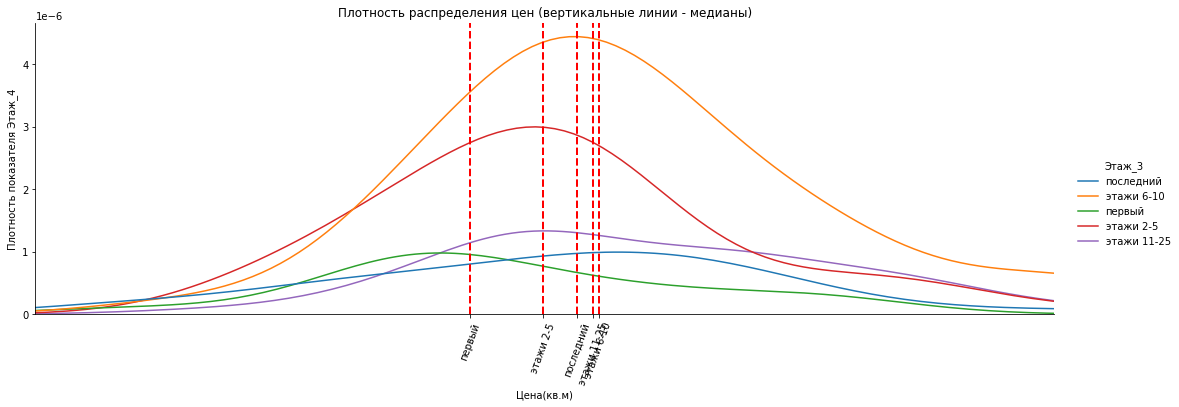


от 15 до 20


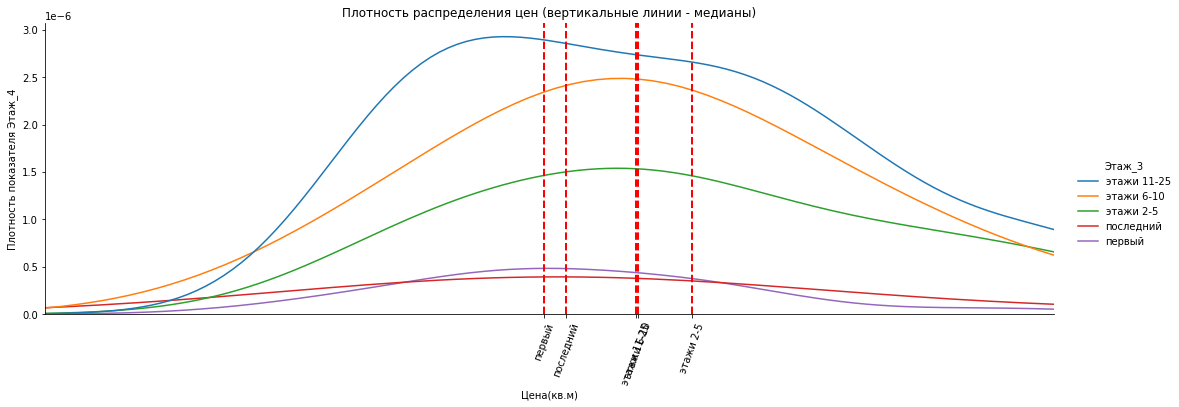


от 20 до 30


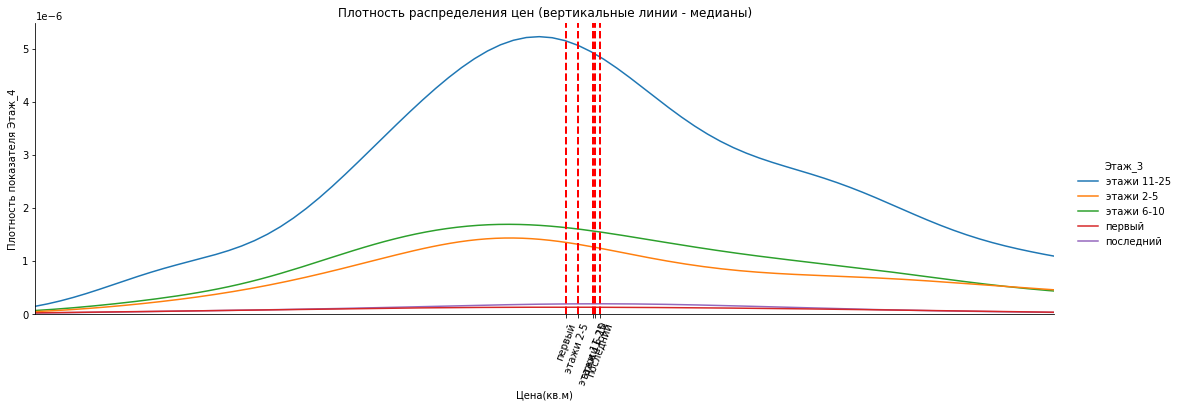


более 30


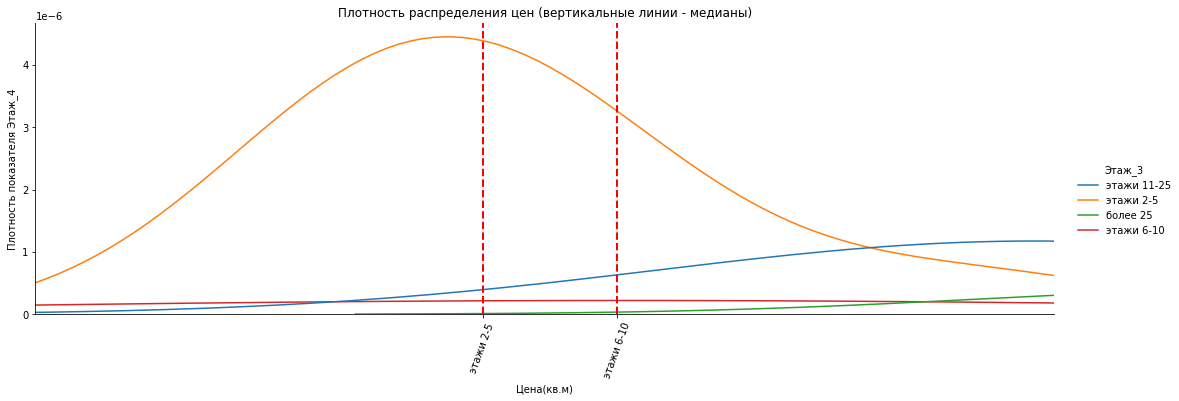

In [196]:
params = ['до 5', 'от 5 до 10', 'от 10 до 15', 'от 15 до 20', 'от 20 до 30', 'более 30']

for param in params:
    df_e = df[df['Этажность_2'] == param]
    print(param)
    g = sns.displot(
        data = df_e,
        x = 'Цена(кв.м)',
        hue = 'Этаж_3',
        kind = 'kde',
        height = 5,
        aspect = 3
    ).set(
        title = 'Плотность распределения цен (вертикальные линии - медианы)', 
        ylabel = 'Плотность показателя Этаж_4'
    )
    g.refline(x = df_e[df_e['Этаж_3'] == 'первый']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'последний']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'этажи 11-25']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'этажи 2-5']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'этажи 6-10']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    plt.xticks(
        [
            df_e[df_e['Этаж_3'] == 'первый']['Цена(кв.м)'].median(), 
            df_e[df_e['Этаж_3'] == 'последний']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_3'] == 'этажи 11-25']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_3'] == 'этажи 2-5']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_3'] == 'этажи 6-10']['Цена(кв.м)'].median(),
        ],
        [
            'первый',
            'последний',
            'этажи 11-25',
            'этажи 2-5',
            'этажи 6-10',
        ],
        rotation = 70
    )
    g.set(xlim=(70000,270000))
    plt.show()
    print()

In [202]:
floors = ['до 5', 'от 5 до 10', 'от 10 до 15', 'от 15 до 20', 'от 20 до 30', 'более 30']
floors

['до 5', 'от 5 до 10', 'от 10 до 15', 'от 15 до 20', 'от 20 до 30', 'более 30']

до 5


,Этаж_1,Цена(кв.м)
0,2.0,164556.962025
1,4.0,160493.827160
2,3.0,160033.990011
3,5.0,154334.038055
4,1.0,145178.414374


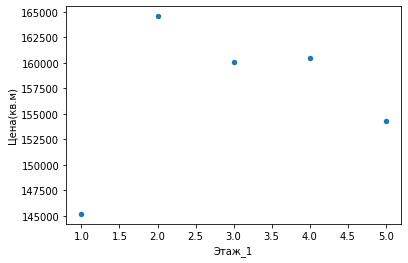

от 5 до 10


,Этаж_1,Цена(кв.м)
0,5.0,168481.548699
1,3.0,166666.666667
2,6.0,164367.816092
3,4.0,162601.609756
4,2.0,161701.318458
5,9.0,160643.163267
6,7.0,157692.307692
7,8.0,157537.847617
8,1.0,155188.306758
9,10.0,144400.785855


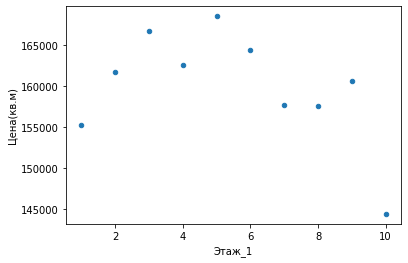

от 10 до 15


,Этаж_1,Цена(кв.м)
0,15.0,201977.623700
1,13.0,195652.173913
2,12.0,186915.887850
3,10.0,186666.666667
4,7.0,183804.153888
5,6.0,182828.282828
6,9.0,178670.360111
7,4.0,178618.592395
8,2.0,172532.205159
9,8.0,172043.010753


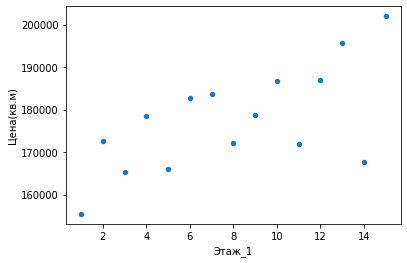

от 15 до 20


,Этаж_1,Цена(кв.м)
0,5.0,228501.299119
1,6.0,219155.844156
2,12.0,206704.825367
3,13.0,201207.417582
4,11.0,197100.528959
5,3.0,193924.114308
6,4.0,189688.016199
7,16.0,187793.427230
8,7.0,187500.000000
9,8.0,184744.857067


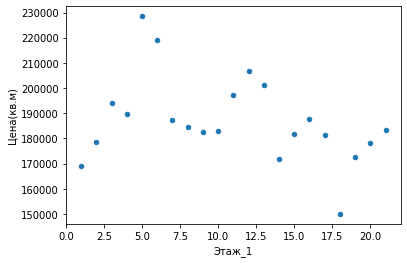

от 20 до 30


,Этаж_1,Цена(кв.м)
0,7.0,203571.428571
1,4.0,201805.701180
2,6.0,189069.423929
3,5.0,188573.337788
4,18.0,187850.083208
5,24.0,187494.739421
6,11.0,184049.693252
7,19.0,182666.026217
8,15.0,181818.181818
9,22.0,180000.000000


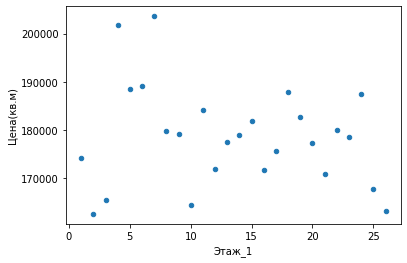

более 30


,Этаж_1,Цена(кв.м)
0,7.0,564356.435644
1,21.0,562659.846547
2,14.0,512500.000000
3,12.0,490196.078431
4,37.0,475000.000000
5,35.0,390000.000000
6,13.0,333333.333333
7,28.0,312000.000000
8,26.0,306000.000000
9,23.0,297000.000000


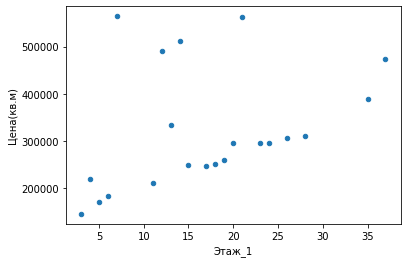

In [229]:
for floor in floors:
    f = pd.DataFrame(df[df['Этажность_2'] == floor].groupby(['Этаж_1'])['Цена(кв.м)'].median().sort_values(ascending=False)).reset_index()
    print(floor)
    display(f)
    f.plot.scatter(x = 'Этаж_1',  y = 'Цена(кв.м)')
    plt.show()

In [208]:
df[df['Этажность_2'] == 'до 5'].groupby(['Этаж_1'])['Цена(кв.м)'].median().sort_values(ascending=False)

Этаж_1
2.0    164556.962025
4.0    160493.827160
3.0    160033.990011
5.0    154334.038055
1.0    145178.414374
Name: Цена(кв.м), dtype: float64

In [224]:
h= pd.DataFrame(df.groupby(['Этаж_1'])['Цена(кв.м)'].median().sort_values(ascending=False)).reset_index()

In [225]:
h

,Этаж_1,Цена(кв.м)
0,37.0,475000.000000
1,35.0,390000.000000
2,28.0,312000.000000
3,24.0,189873.417722
4,18.0,187850.083208
5,13.0,184836.353278
6,20.0,183299.808364
7,15.0,182333.873582
8,19.0,181967.213115
9,17.0,180621.039290
